<a href="https://colab.research.google.com/github/shivam-cse/CS-306-Machine-Learning-Work/blob/main/Lab6/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
print(iris.DESCR)

In [ ]:
X = iris['data']
Y = iris['target']
dataset = pd.DataFrame(X, columns=iris.feature_names)
dataset

In [ ]:
index = list()
for i in range(len(X)):
  index.append(i)
index = np.array(index)


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(index, Y)
plt.show()

In [ ]:
dataset.plot.kde()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
dataset_new = minmax.fit_transform(dataset)
dataset = pd.DataFrame(dataset_new, columns=iris.feature_names)
dataset.plot.kde()

In [ ]:
dataset['class'] = iris.target
dataset

In [ ]:
dataset = dataset[dataset['class'] != 2]
dataset

In [ ]:
X = dataset.iloc[ :, : -1].values
Y = dataset.iloc[ :, -1: ].values
Y

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
train_frac = 0.3  #30%   left ->: 100-30 = 70%
valid_frac = 10/70 #(100/70)*10
test_frac = 60/70 #(100/70)*60

x_train, x_rem, y_train, y_rem = train_test_split(X, Y, train_size=train_frac)
x_valid, x_test, y_valid,  y_test = train_test_split(x_rem, y_rem,  test_size=test_frac)

In [ ]:
y_train

In [ ]:
# print(train_frac)
# print(valid_frac)
# print(test_frac)
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
def sigmoid(z):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-z))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(theta, x.T)

def probability(theta, b, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x) + b)


def cost_function(theta, b, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = (-1 / m) * np.sum(
        y * np.log(probability(theta, b, x)) + (1 - y) * np.log(
            1 - probability(theta, b, x)))
    return total_cost


def batch_gradient_descent(X, y_true, epochs, learning_rate, rho):

    number_of_features = X.shape[1] #number of the feature
    # numpy array with 1 row and columns equal to number of features.
    w = np.ones(shape=(number_of_features))  
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    prev_jw = 100000
    
    for i in range(epochs+1):  
        y_predicted = sigmoid(np.dot(w, X.T) + b)  # = w1*x1 + w2*x2 + b
        jw = cost_function(w , b, X, y_true)
       
        w_grad = (1/total_samples)*(X.T.dot(y_predicted - y_true))
        b_grad = (1/total_samples)*np.sum(y_predicted - y_true)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        # jw = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        if i%10==0:
            cost_list.append(jw)
            epoch_list.append(i)
        # print("Abs Difference = ", abs(prev_jw - jw))  
        if(abs(prev_jw - jw) < rho):
          print("dif = ", abs(prev_jw - jw))
          break
        prev_jw = jw
        
    return w, b, jw, cost_list, epoch_list, i

# w, b, cost, cost_list, epoch_list = batch_gradient_descent(x_train,np.array(y_train).reshape(np.array(y_train).shape[0],),50)



##**Hyperparameter tuning on the validation set.**

In [ ]:
alpha = [0.001, 0.0001, 0.0008, 0.00003, 0.001]
rho = [0.00001, 0.00001, 0.00007, 0.000008, 0.00009]
epochs = [300, 350, 300, 400, 500]
for a, r, e in zip(alpha, rho, epochs):
  w, b, cost, cost_list, epoch_list, last_epoch = batch_gradient_descent(x_train,np.array(y_train).reshape(np.array(y_train).shape[0],),e, a, r)
  print("Alpha = ", a, "Epochs = ", e, " Total Epochs Run = ", last_epoch,  "Rho = ", r)
  print("Weights : ", w)
  print("Train MSE : ", cost)
  validation_cost = cost_function(w, b, x_valid, np.array(y_valid).reshape(np.array(y_valid).shape[0],))
  print("Validation MSE : ", validation_cost)
  print("-------------------------------------------")
    

Alpha =  0.001 Epochs =  300  Total Epochs Run =  300 Rho =  1e-05
Weights :  [1.07423698 1.00759648 1.0973337  1.09291655]
Train MSE :  -0.615516670375008
Validation MSE :  0.0731009874441475
-------------------------------------------
Alpha =  0.0001 Epochs =  350  Total Epochs Run =  350 Rho =  1e-05
Weights :  [1.00878069 1.00100863 1.0114876  1.01096417]
Train MSE :  -0.5346818642815028
Validation MSE :  0.10209747432888279
-------------------------------------------
Alpha =  0.0008 Epochs =  300  Total Epochs Run =  300 Rho =  7e-05
Weights :  [1.05957215 1.00625981 1.07806924 1.0745232 ]
Train MSE :  -0.59765669895109
Validation MSE :  0.07936786048278006
-------------------------------------------
Alpha =  3e-05 Epochs =  400  Total Epochs Run =  400 Rho =  8e-06
Weights :  [1.00301341 1.00034957 1.00394161 1.00376194]
Train MSE :  -0.5274107523561178
Validation MSE :  0.10478603188082725
-------------------------------------------
Alpha =  0.001 Epochs =  500  Total Epochs Run

## **Check for overfitting on the validation set by plotting graph during training of the finalized model.**

In [ ]:
def sigmoid(z):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-z))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(theta, x.T)

def probability(theta, b, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x) + b)


def cost_function(theta, b, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, b, x)) + (1 - y) * np.log(
            1 - probability(theta, b, x)))
    return total_cost


def batch_gradient_descent(X, y_true,x_valid, y_valid, epochs, learning_rate, rho):

    number_of_features = X.shape[1] #number of the feature
    # numpy array with 1 row and columns equal to number of features.
    w = np.ones(shape=(number_of_features))  
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    cost_valid = []
    prev_jw = 0
    
    for i in range(epochs+1):  
        y_predicted = sigmoid(np.dot(w, X.T) + b)  # = w1*x1 + w2*x2 + b
        jw = cost_function(w , b, X, y_true)
        validation_cost = cost_function(w, b, x_valid, np.array(y_valid).reshape(np.array(y_valid).shape[0],))
        w_grad = (1/total_samples)*(X.T.dot(y_predicted - y_true))
        b_grad = (1/total_samples)*np.sum(y_predicted - y_true)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        # jw = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        if i%10==0:
            cost_list.append(jw)
            epoch_list.append(i)
            cost_valid.append(validation_cost)
        # print("Abs Difference = ", abs(prev_jw - jw))  
        if(abs(prev_jw - jw) < rho):
          break;
        prev_jw = jw
        
    return w, b, jw, cost_list, epoch_list, cost_valid

# w, b, cost, cost_list, epoch_list = batch_gradient_descent(x_train,np.array(y_train).reshape(np.array(y_train).shape[0],),50)



In [ ]:
alpha = [0.001]
rho = [0.00009]
epochs = [500]
for a, r, e in zip(alpha, rho, epochs):
  w, b, cost, cost_list, epoch_list, cost_valid = batch_gradient_descent(x_train,np.array(y_train).reshape(np.array(y_train).shape[0],),x_valid, y_valid,e, a, r)
  print("Alpha = ", a, "Epochs = ", e, " Total Epochs Run = ", last_epoch,  "Rho = ", r)
  print("Train MSE : ", cost)
  validation_cost = cost_function(w, b, x_valid, np.array(y_valid).reshape(np.array(y_valid).shape[0],))
  print("Validation MSE : ", validation_cost)
  print("-------------------------------------------")


Alpha =  0.001 Epochs =  500  Total Epochs Run =  500 Rho =  9e-05
Train MSE :  -0.5970361869766974
Validation MSE :  -1.3089215316139007
-------------------------------------------


In [ ]:
epoch_list

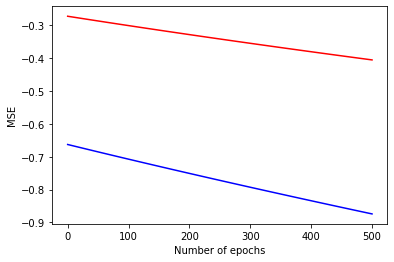

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epoch_list , cost_list, color="blue")
plt.plot(epoch_list , cost_valid, color="red")
plt.xlabel("Number of epochs")
plt.ylabel("MSE")
plt.show()


# **Now i need to solve last question of previous assignment**

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
ratio = 0.1

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=train_frac)

In [ ]:
print(x_valid.shape)
print(y_valid.shape)
print(np.array(y_valid).reshape(np.array(y_valid).shape[0],))
print(np.array(y_valid).reshape(np.array(y_valid).shape[0],).shape)

(10, 4)
(10, 1)
[0 1 0 1 1 0 1 0 1 0]
(10,)


In [ ]:
w = np.ones(shape=(2))
x = [[1.2, 3],
     [3, 4], 
     [6,7], 
     [9,10]]
y = [1,0,1,1]  
print(np.array(y).shape)
print(np.array(x).shape)
net_input(w, np.array(x))

probability(w, b, np.array(x))


(4,)
(4, 2)


array([0.9848502 , 0.99906544, 0.99999768, 0.99999999])

In [ ]:
cost_function(w, 1, np.array(x), np.array(y))

2.001459410968099

In [ ]:
sigmoid(5.2)